In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_classes =2,
                           n_features=10, n_informative=2, n_redundant=8,
                           shuffle=False, random_state=1)

dfX = pd.DataFrame(data=X)
dfy = pd.DataFrame(data=y)
dfX.columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10']
dfy.columns = ['target']
dfZ = pd.concat([dfX,dfy], axis=1)
df = dfZ

# df.describe()

In [3]:
# Plot pairwise relationships in a dataset.
""""
# Print all columns
sns.pairplot(df, kind="kde")
plt.show()

col_study = ['c1','c2','c3','target']
sns.pairplot(df[col_study], kind="kde", corner=False)
plt.show()
"""

'"\n# Print all columns\nsns.pairplot(df, kind="kde")\nplt.show()\n\ncol_study = [\'c1\',\'c2\',\'c3\',\'target\']\nsns.pairplot(df[col_study], kind="kde", corner=False)\nplt.show()\n'

In [4]:
# Correlation matrix
df.corr()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,target
c1,1.0,0.0,0.7,-0.1,0.7,-0.4,0.6,-0.4,0.5,0.8,-0.0
c2,0.0,1.0,-0.7,1.0,0.8,-0.9,-0.8,-0.9,-0.8,-0.5,0.7
c3,0.7,-0.7,1.0,-0.8,-0.1,0.5,1.0,0.4,1.0,1.0,-0.6
c4,-0.1,1.0,-0.8,1.0,0.7,-0.9,-0.9,-0.9,-0.9,-0.6,0.7
c5,0.7,0.8,-0.1,0.7,1.0,-0.9,-0.2,-1.0,-0.3,0.2,0.5
c6,-0.4,-0.9,0.5,-0.9,-0.9,1.0,0.6,1.0,0.6,0.2,-0.7
c7,0.6,-0.8,1.0,-0.9,-0.2,0.6,1.0,0.5,1.0,0.9,-0.6
c8,-0.4,-0.9,0.4,-0.9,-1.0,1.0,0.5,1.0,0.6,0.1,-0.7
c9,0.5,-0.8,1.0,-0.9,-0.3,0.6,1.0,0.6,1.0,0.9,-0.6
c10,0.8,-0.5,1.0,-0.6,0.2,0.2,0.9,0.1,0.9,1.0,-0.4


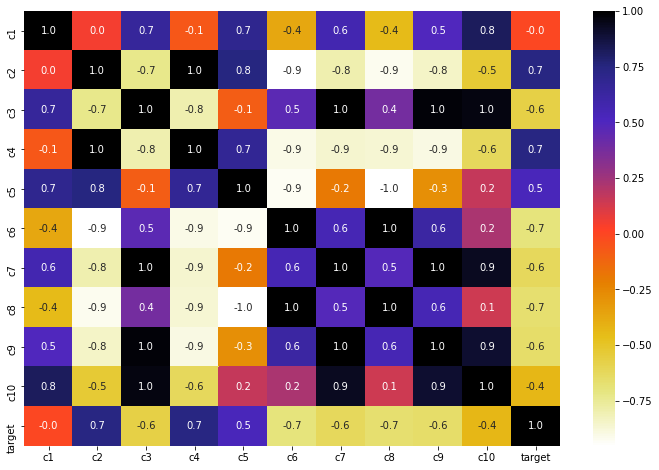

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt = '.1f', cmap = plt.cm.CMRmap_r)
plt.show()

In [6]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [7]:
# Features that can be eliminated (hihgly positive or highly negative)
corr_features = correlation(dfX, 0.9)
print(len(set(corr_features)))
print(sorted(corr_features))

6
['c10', 'c4', 'c6', 'c7', 'c8', 'c9']


In [8]:
# Alternative way with no loop
#res =  [ (dfX.corr()>0.9) | (dfX.corr()<-0.9)]
#print(res)

# Drop correlated features
dfX = dfX.drop(corr_features, axis=1)
dfX.describe()

,c1,c2,c3,c5
count,"10,000.0","10,000.0","10,000.0","10,000.0"
mean,0.0,-0.0,0.0,-0.0
std,1.2,1.4,1.7,0.9
min,-2.9,-4.1,-5.3,-2.7
25%,-1.0,-1.1,-1.5,-0.6
50%,-0.3,-0.2,-0.1,-0.0
75%,1.0,1.0,1.2,0.5
max,4.9,4.7,6.1,3.2
